In [322]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

In [323]:
def load_data(fname):
    with open(fname, "r") as f:
        # ignore `vertices: ...` at head and `Total: ..` at tail
        raws = f.readlines()
    header = [i.strip() for i in raws[0].split(',')]
    lines = [[j.strip() for j in i.split(',')] for i in raws[1:]]
    t = pd.DataFrame.from_records(lines, columns=header)
    res = t[header].apply(pd.to_numeric, errors='ignore')
    return res

In [331]:
def load_files(paths):
    frames = []
    for i in paths:
        print(i)
        frames.append(load_data(i))
    res = pd.concat(frames)
    return res

In [325]:
def gen_xy(df=None, colx='', coly='', ignore=True):
    tg = df.groupby(colx)
    x = []
    y = []
    for k, v in tg[coly].apply(lambda _: np.average(_)).items():
        if ignore and tg.size()[int(k)] < 100:
            continue
        x.append(int(k))
        y.append(v)
    return x, y

In [326]:
def plot_graph(xlabel='', ylabel='', xs=[[]], ys=[[]], labels=[], color=None):
    fig, ax = plt.subplots()
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)

    n = len(xs)
    for i in range(n):
        x = xs[i]
        y = ys[i]
        if color is not None:
            ax.scatter(x, y, color=color)
            ax.plot(x, y, label=labels[i], color=color)
        else:
            ax.scatter(x, y)
            ax.plot(x, y, label=labels[i])
    ax.legend(labels)

# S1: EDBT vs Polyanya

[time] * [vnum, dist, K]

In [41]:
paths = os.listdir('../outputs/s1/')
paths = ['../outputs/s1/' + i for i in paths]

In [42]:
# paths = ['s1-1-300.log', 's1-2-300.log', 's1-3-300.log', 's1-4-300.log', 's1-5-300.log']
df = load_files(paths)
df = df[df.K == df.order]
df.head()

,K,order,dist,cost_ki,cost_edbt,vnum,density
3,4,4,1379.94,46.742,186373.0,4,1.07541
7,4,4,925.29,19.816,51884.1,2,1.07541
11,4,4,1225.90,29.856,122331.0,4,1.07541
15,4,4,1527.86,39.132,132107.0,4,1.07541
19,4,4,1326.32,40.740,214491.0,5,1.07541


In [43]:
df.shape

(16800, 7)

## Graph 1: [time, vnum]

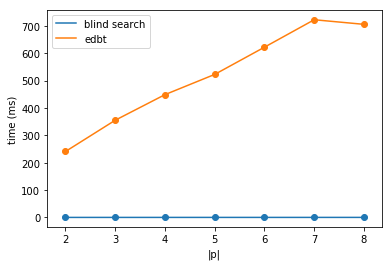

In [44]:
x0, y0 = gen_xy(df, 'vnum', 'cost_ki')
x1, y1 = gen_xy(df, 'vnum', 'cost_edbt')
y0 = [i / 1000 for i in y0]
y1 = [i / 1000 for i in y1]
plot_graph('|p|', 'time (ms)', [x0, x1], [y0, y1], ['blind search', 'edbt'])

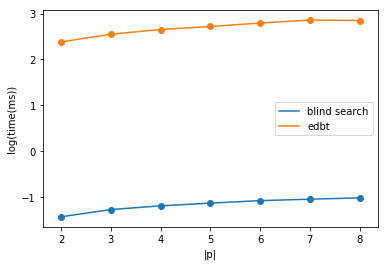

In [45]:
x0, y0 = gen_xy(df, 'vnum', 'cost_ki')
x1, y1 = gen_xy(df, 'vnum', 'cost_edbt')
y0 = [i / 1000 for i in y0]
y1 = [i / 1000 for i in y1]
y0 = np.log10(y0)
y1 = np.log10(y1)
plot_graph('|p|', 'log(time(ms))', [x0, x1], [y0, y1], ['blind search', 'edbt'])

## Graph 2: [time, dist]

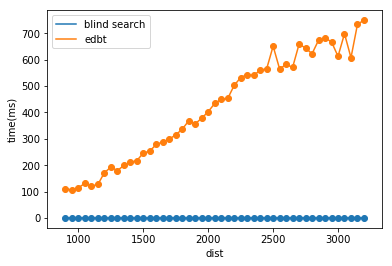

In [46]:
df2 = df.copy()
df2.dist = (df.dist / 50).astype(int)
x0, y0 = gen_xy(df2, 'dist', 'cost_ki')
x1, y1 = gen_xy(df2, 'dist', 'cost_edbt')
x0 = [i * 50 for i in x0]
x1 = [i * 50 for i in x1]
y0 = [i / 1000 for i in y0]
y1 = [i / 1000 for i in y1]
plot_graph('dist', 'time(ms)', [x0, x1], [y0, y1], ['blind search', 'edbt'])

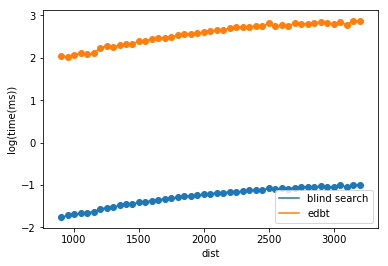

In [47]:
df2 = df.copy()
df2.dist = (df.dist / 50).astype(int)
x0, y0 = gen_xy(df2, 'dist', 'cost_ki')
x1, y1 = gen_xy(df2, 'dist', 'cost_edbt')
x0 = [i * 50 for i in x0]
x1 = [i * 50 for i in x1]
y0 = [i / 1000 for i in y0]
y1 = [i / 1000 for i in y1]
y0 = np.log10(y0)
y1 = np.log10(y1)
plot_graph('dist', 'log(time(ms))', [x0, x1], [y0, y1], ['blind search', 'edbt'])

## Graph 3: [time, K]

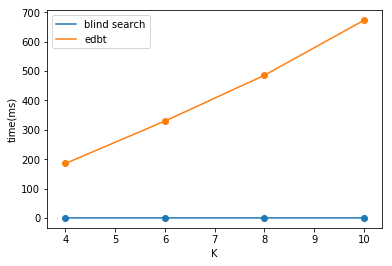

In [48]:
x0, y0 = gen_xy(df, 'K', 'cost_ki')
x1, y1 = gen_xy(df, 'K', 'cost_edbt')
y0 = [i / 1000 for i in y0]
y1 = [i / 1000 for i in y1]
plot_graph('K', 'time(ms)', [x0, x1], [y0, y1], ['blind search', 'edbt'])

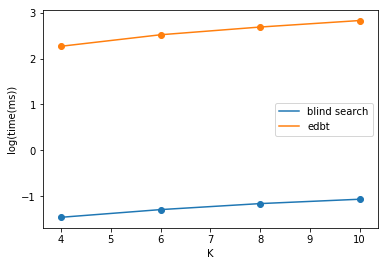

In [49]:
x0, y0 = gen_xy(df, 'K', 'cost_ki')
x1, y1 = gen_xy(df, 'K', 'cost_edbt')
y0 = [i / 1000 for i in y0]
y1 = [i / 1000 for i in y1]
y0 = np.log10(y0)
y1 = np.log10(y1)
plot_graph('K', 'log(time(ms))', [x0, x1], [y0, y1], ['blind search', 'edbt'])

# S2: Heuristic vs Polyanya
[generate node, pushed node, popped node, time, h-ratio] * [vnum, dist, density, K]

* generate node: how many nodes have been generated during the search
* pushed node: how many nodes have been pushed during the search
* popped node: how many nodes have been popped during the search
* h-ratio: heurstic elapsed time / total elapsed time

In [332]:
paths = os.listdir('../outputs/s2/')
paths = ['../outputs/s2/' + i for i in paths]

In [182]:
#paths = ["../aurora.log"]

In [334]:
#paths = ['s2-1-300.log', 's2-1-9000.log', 's2-2-300.log', 's2-3-300.log']
df0 = load_files(paths)
df0.head()

../outputs/s2/4500-8-5.log
../outputs/s2/9000-6-6.log
../outputs/s2/7200-10-6.log
../outputs/s2/6300-10-4.log
../outputs/s2/4500-10-6.log
../outputs/s2/5400-10-4.log
../outputs/s2/4800-8-6.log
../outputs/s2/8100-8-6.log
../outputs/s2/5400-6-5.log
../outputs/s2/5700-8-2.log
../outputs/s2/7500-6-4.log
../outputs/s2/9000-4-4.log
../outputs/s2/6900-8-7.log
../outputs/s2/7800-8-8.log
../outputs/s2/3600-10-4.log
../outputs/s2/6600-10-1.log
../outputs/s2/8700-8-1.log
../outputs/s2/5100-10-1.log
../outputs/s2/7800-10-10.log
../outputs/s2/3300-10-1.log
../outputs/s2/3900-8-2.log
../outputs/s2/5100-8-5.log
../outputs/s2/4800-10-5.log
../outputs/s2/4800-10-4.log
../outputs/s2/5100-8-4.log
../outputs/s2/3900-8-3.log
../outputs/s2/8400-8-8.log
../outputs/s2/7800-6-6.log
../outputs/s2/3600-10-5.log
../outputs/s2/7500-6-5.log
../outputs/s2/6900-8-6.log
../outputs/s2/5700-8-3.log
../outputs/s2/8100-8-7.log
../outputs/s2/4800-8-7.log
../outputs/s2/7800-4-4.log
../outputs/s2/5400-6-4.log
../outputs/s2/5

,k,order,dist,cost_polyanya,cost_ki,cost_hi,cost_hi2,h_cost,h_cost2,vnum,...,push_hi2,prune_hi2,hcall2,reevaluate2,precost,gen_pre,edgecnt,damcnt,pts,polys
0,5.0,5.0,47317.6,19621.00,79241.9,94529.3,66973.5,83316.0,55244.0,57.0,...,11384.0,264.0,7567.0,2331.0,184802.0,217130.0,94098.0,198504.0,8.0,4180.0
1,5.0,5.0,61801.8,37694.20,75208.7,90862.7,81610.9,79737.0,69157.0,45.0,...,11576.0,251.0,9516.0,3023.0,184802.0,217130.0,94098.0,198504.0,8.0,4180.0
2,5.0,5.0,33327.1,6949.03,32518.3,23806.3,18653.7,20477.0,15335.0,19.0,...,3584.0,70.0,2481.0,491.0,184802.0,217130.0,94098.0,198504.0,8.0,4180.0
3,5.0,5.0,59521.4,21329.40,79882.0,135793.0,113934.0,118399.0,95094.0,31.0,...,17467.0,439.0,13121.0,3033.0,184802.0,217130.0,94098.0,198504.0,8.0,4180.0
4,5.0,5.0,38863.4,10596.00,33574.7,74012.9,48617.8,65126.0,40332.0,31.0,...,8528.0,138.0,5258.0,1132.0,184802.0,217130.0,94098.0,198504.0,8.0,4180.0


In [23]:
#df0 = load_files(['../test.log'])

In [365]:
#df = df0[(df0.k <= 1) & (df0.k == df0.order)]
df = df0

In [366]:
print ((df.cost_ki / df.cost_hi2).mean())
print ((df.cost_ki / df.cost_hi).mean())

2.23185178589
1.32518413408


In [44]:
#df = load_files(['../aurora.log'])

## 1. Examine `vnum`

* Graph 1: `[gen node, vnum]`
* Graph 2: `[push node, vnum]`
* Graph 3: `[pop node, vnum]`
* Graph 4: `[time, vnum]`

In [319]:
df.head()

,k,order,dist,cost_polyanya,cost_ki,cost_hi,cost_hi2,h_cost,h_cost2,vnum,...,push_hi2,prune_hi2,hcall2,reevaluate2,precost,gen_pre,edgecnt,damcnt,pts,polys
0,1,1,14763.70,56062.7,6830.940,5011.920,1886.390,4621,1558,10,...,434,0,126,0,314709,334360,139510,305951,10,6133
1,1,1,5363.84,30264.4,456.723,486.293,250.753,454,222,7,...,49,0,16,0,314709,334360,139510,305951,10,6133
2,1,1,10357.90,29649.4,2114.660,2115.530,569.356,1995,467,7,...,166,0,37,0,314709,334360,139510,305951,10,6133
3,1,1,27160.70,20567.2,34003.500,25330.500,6720.600,23354,5240,32,...,1980,54,397,0,314709,334360,139510,305951,10,6133
4,1,1,11675.20,75017.3,3403.740,4279.240,1046.350,3958,804,10,...,366,1,66,0,314709,334360,139510,305951,10,6133


In [245]:
df[["hcall", "hcall2"]]

,hcall,hcall2
0,370,126
1,33,16
2,134,37
3,1742,397
4,312,66
5,537,195
6,294,107
7,2960,662
8,986,281
9,766,178


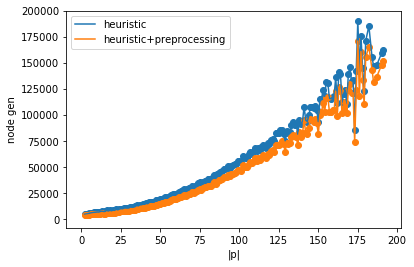

In [367]:
x0, y0 = gen_xy(df, 'vnum', 'hcall', False)
x1, y1 = gen_xy(df, 'vnum', 'hcall2', False)
plot_graph('|p|', "node gen", [x0, x1], [y0, y1], ["heuristic", "heuristic+preprocessing"])

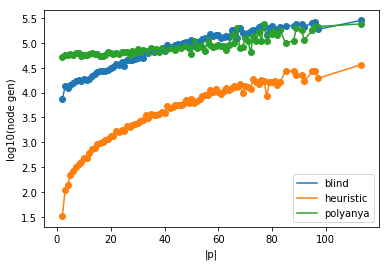

In [368]:
# Graph 1: [gen node, vnum]
x0, y0 = gen_xy(df[df.k <= 1], 'vnum', 'gen_ki', False)
x1, y1 = gen_xy(df[df.k <= 1], 'vnum', 'gen_hi2', False)
x2, y2 = gen_xy(df[df.k <= 1], 'vnum' ,'gen_poly', False)
y0 = np.log10(y0)
y1 = np.log10(y1)
y2 = np.log10(y2)
plot_graph('|p|', 'log10(node gen)', [x0, x1, x2], [y0, y1, y2], ['blind', 'heuristic', 'polyanya'])

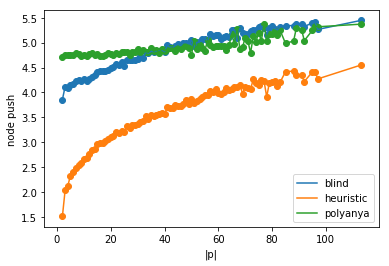

In [369]:
# Graph 2: [push node, vnum]
x0, y0 = gen_xy(df[df.k <= 1], 'vnum', 'push_ki', False)
x1, y1 = gen_xy(df[df.k <= 1], 'vnum', 'push_hi2', False)
x2, y2 = gen_xy(df[df.k <= 1], 'vnum' ,'push_poly', False)
y0 = np.log10(y0)
y1 = np.log10(y1)
y2 = np.log10(y2)
plot_graph('|p|', 'node push', [x0, x1, x2], [y0, y1, y2], ['blind', 'heuristic', 'polyanya'])

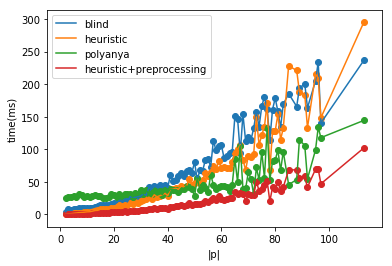

In [370]:
# Graph 4: [time, vnum]
x0, y0 = gen_xy(df[df.k == 1], 'vnum', 'cost_ki', False)
x1, y1 = gen_xy(df[df.k == 1], 'vnum', 'cost_hi', False)
x2, y2 = gen_xy(df[df.k == 1], 'vnum', 'cost_hi2', False)
x3, y3 = gen_xy(df[df.k == 1], 'vnum' ,'cost_polyanya', False)
y0 = [i / 1000 for i in y0]
y1 = [i / 1000 for i in y1]
y2 = [i / 1000 for i in y2]
y3 = [i / 1000 for i in y3]
plot_graph('|p|', 'time(ms)', [x0, x1, x3, x2], [y0, y1, y3, y2], ['blind', 'heuristic', 'polyanya', 'heuristic+preprocessing'])

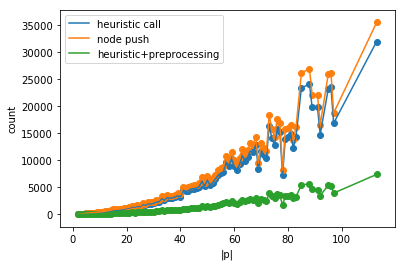

In [371]:
# Graph 5: [h-call, vnum]
x0, y0 = gen_xy(df[df.k == 1], 'vnum', 'hcall', False)
x1, y1 = gen_xy(df[df.k == 1], "vnum", 'push_hi', False)
x2, y2 = gen_xy(df[df.k == 1], 'vnum', 'hcall2', False)
plot_graph('|p|', 'count', [x0, x1, x2], [y0, y1, y2], ['heuristic call', 'node push', 'heuristic+preprocessing'])

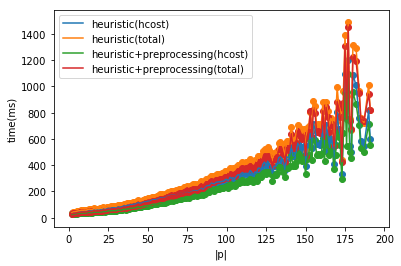

In [372]:
# Graph 6: [h-ratio, vnum]
x0, y0 = gen_xy(df, 'vnum', 'h_cost', False)
x1, y1 = gen_xy(df, 'vnum', 'cost_hi', False)
x2, y2 = gen_xy(df, 'vnum', 'h_cost2', False)
x3, y3 = gen_xy(df, 'vnum', 'cost_hi2', False)
y0 = [i / 1000 for i in y0]
y1 = [i / 1000 for i in y1]
y2 = [i / 1000 for i in y2]
y3 = [i / 1000 for i in y3]
plot_graph('|p|', 'time(ms)', [x0, x1, x2, x3], [y0, y1, y2, y3], [
    'heuristic(hcost)', 'heuristic(total)', 'heuristic+preprocessing(hcost)', "heuristic+preprocessing(total)"])

### Explain

* Graph 1, 2, 3 show that the search space of the `heuristic` approach is always smaller than `knn` and `polyanya`.

* Graph 4 shows that the `heuristic` approach is the fastest when `vnum <=40`

* Graph 5, 6 explain the reason why the `heuristic` approach becomes slow when `vnum > 40`

## 2. Examine `poly num`

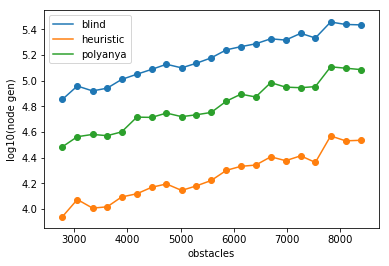

In [373]:
# Graph 7: [nodes gen, polys]
x0, y0 = gen_xy(df, 'polys', 'gen_ki')
x1, y1 = gen_xy(df, 'polys', 'gen_hi2')
x2, y2 = gen_xy(df, 'polys', 'gen_poly')
y0 = np.log10(y0)
y1 = np.log10(y1)
y2 = np.log10(y2)
plot_graph('obstacles', 'log10(node gen)', [x0, x1, x2], [y0, y1, y2], ['blind', 'heuristic', 'polyanya'])

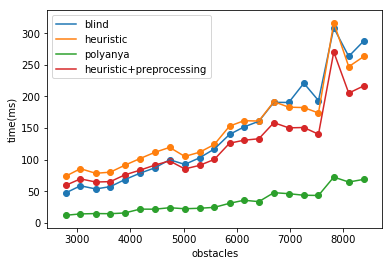

In [374]:
# Graph 8: [time, polys]
x0, y0 = gen_xy(df, 'polys', 'cost_ki')
x1, y1 = gen_xy(df, 'polys', 'cost_hi')
x2, y2 = gen_xy(df, 'polys', 'cost_polyanya')
x3, y3 = gen_xy(df, 'polys', 'cost_hi2')
y0 = [i / 1000 for i in y0]
y1 = [i / 1000 for i in y1]
y2 = [i / 1000 for i in y2]
y3 = [i / 1000 for i in y3]
plot_graph('obstacles', 'time(ms)', [x0, x1, x2, x3], [y0, y1, y2, y3], ['blind', 'heuristic', 'polyanya', 'heuristic+preprocessing'])

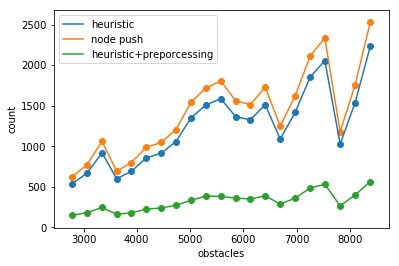

In [345]:
x0, y0 = gen_xy(df, 'polys', 'hcall')
x1, y1 = gen_xy(df, 'polys', 'push_hi')
x2, y2 = gen_xy(df, 'polys', 'hcall2')
plot_graph("obstacles", 'count', [x0, x1, x2], [y0, y1, y2], ['heuristic', 'node push', 'heuristic+preporcessing'])

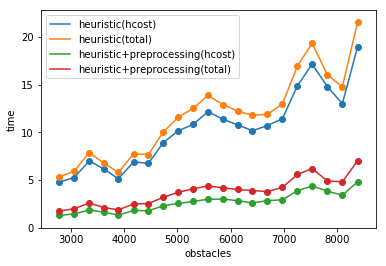

In [346]:
x0, y0 = gen_xy(df, 'polys', 'h_cost')
x1, y1 = gen_xy(df, 'polys', 'cost_hi')
x2, y2 = gen_xy(df, 'polys', 'h_cost2')
x3, y3 = gen_xy(df, 'polys', 'cost_hi2')
y0 = [i / 1000 for i in y0]
y1 = [i / 1000 for i in y1]
y2 = [i / 1000 for i in y2]
y3 = [i / 1000 for i in y3]
plot_graph("obstacles", "time", [x0, x1, x2, x3], [y0, y1, y2, y3], ["heuristic(hcost)", "heuristic(total)", 
                                                                     "heuristic+preprocessing(hcost)", "heuristic+preprocessing(total)"])

### Explain

* Graph 7 shows that the search space of the `heuristic` approach is always smaller than `knn` and `polyanya`

* Graph 8 shows that the time is increasing when the number of obstacles increase, and `heuristic` is the fastest when `K=1`

## 3. Examine `points num`

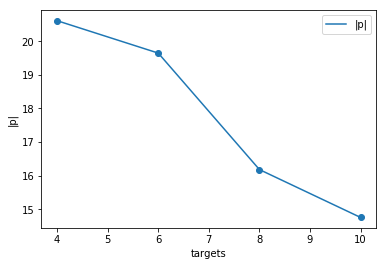

In [347]:
x0, y0 = gen_xy(df, 'pts', 'vnum')
plot_graph('targets', '|p|', [x0], [y0], ['|p|'])

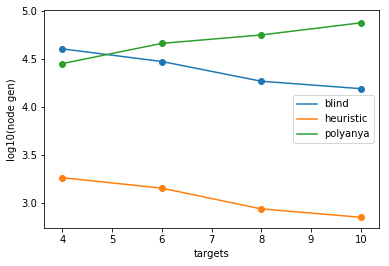

In [267]:
# Graph 9: [node push, pts]
x0, y0 = gen_xy(df, 'pts', 'gen_ki')
x1, y1 = gen_xy(df, 'pts', 'gen_hi')
x2, y2 = gen_xy(df, 'pts', 'gen_poly')
y0 = np.log10(y0)
y1 = np.log10(y1)
y2 = np.log10(y2)
plot_graph('targets', 'log10(node gen)', [x0, x1, x2], [y0, y1, y2], ['blind', 'heuristic', 'polyanya'])

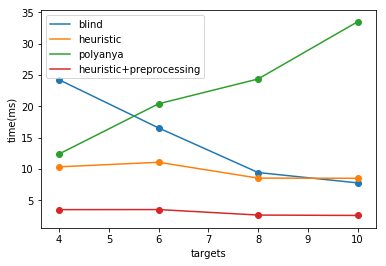

In [269]:
# Graph 10: [time, pts]
x0, y0 = gen_xy(df, 'pts', 'cost_ki')
x1, y1 = gen_xy(df, 'pts', 'cost_hi')
x2, y2 = gen_xy(df, 'pts', 'cost_polyanya')
x3, y3 = gen_xy(df, 'pts', 'cost_hi2')
y0 = [i / 1000 for i in y0]
y1 = [i / 1000 for i in y1]
y2 = [i / 1000 for i in y2]
y3 = [i / 1000 for i in  y3]
plot_graph('targets', 'time(ms)', [x0, x1, x2, x3], [y0, y1, y2, y3], ['blind', 'heuristic', 'polyanya', 'heuristic+preprocessing'])

In [300]:
df1 = df
df1.head()

,k,order,dist,cost_polyanya,cost_ki,cost_hi,cost_hi2,h_cost,h_cost2,vnum,...,push_hi2,prune_hi2,hcall2,reevaluate2,precost,gen_pre,edgecnt,damcnt,pts,polys
0,5,5,47317.6,19621.00,79241.9,94529.3,66973.5,83316,55244,57,...,11384,264,7567,2331,184802,217130,94098,198504,8,4180
1,5,5,61801.8,37694.20,75208.7,90862.7,81610.9,79737,69157,45,...,11576,251,9516,3023,184802,217130,94098,198504,8,4180
2,5,5,33327.1,6949.03,32518.3,23806.3,18653.7,20477,15335,19,...,3584,70,2481,491,184802,217130,94098,198504,8,4180
3,5,5,59521.4,21329.40,79882.0,135793.0,113934.0,118399,95094,31,...,17467,439,13121,3033,184802,217130,94098,198504,8,4180
4,5,5,38863.4,10596.00,33574.7,74012.9,48617.8,65126,40332,31,...,8528,138,5258,1132,184802,217130,94098,198504,8,4180


In [349]:
df1["ratio"] = df1.damcnt / df1.edgecnt

In [358]:
df1.ratio.describe()

count    71399.000000
mean         2.105467
std          0.176648
min          1.606767
25%          2.109545
50%          2.160180
75%          2.204430
max          2.293319
Name: ratio, dtype: float64

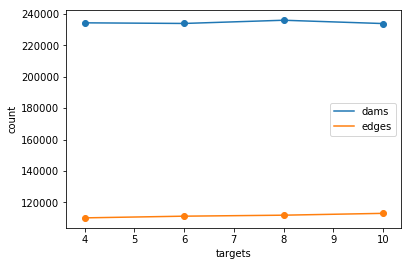

In [301]:
x0, y0 = gen_xy(df1, 'pts', 'damcnt')
x1, y1 = gen_xy(df1, 'pts', 'edgecnt')
plot_graph('targets', 'count', [x0, x1], [y0, y1], ['dams', 'edges'])

### Explain

* Graph 9 shows that the search space of `heuristic` and `knn` decreased by `pts`, and the search space of `heuristic` is smaller than others

* Graph 10 shows that the execution time of `heuristic` and `knn` decreased by `pts`, and `knn` is faster than `heuristic` when `pts >= 10`

## 4. Examine `K (|pts| = 10)`

In [359]:
df = df0[df0.pts >= 1]

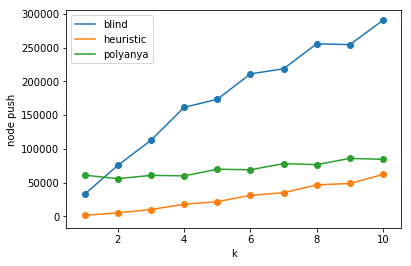

In [360]:
# Graph 11: [node push, K]
x0, y0 = gen_xy(df, 'k', 'push_ki')
x1, y1 = gen_xy(df, 'k', 'push_hi')
x2, y2 = gen_xy(df, 'k', 'push_poly')
plot_graph('k', 'node push', [x0, x1, x2], [y0, y1, y2], ['blind', 'heuristic', 'polyanya'])

In [286]:
y3

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

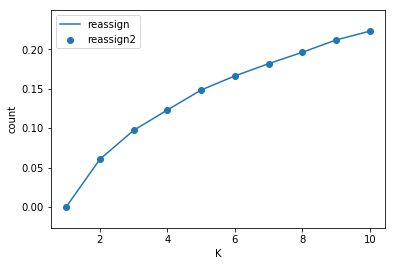

In [361]:
x2, y2 = gen_xy(df, 'k', 'push_hi', False)
x1, y1 = gen_xy(df, 'k', 'reevaluate2', False)
y1 = [float(y1[i]) / float(y2[i]) for i in range(len(x2))]
plot_graph('K', 'count', [x1], [y1], ['reassign', 'reassign2'])

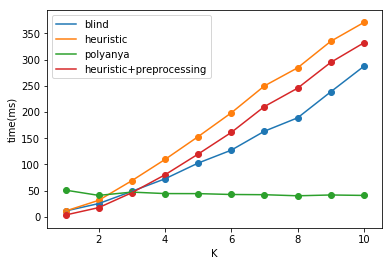

In [362]:
# Graph 12: [time, K]
x0, y0 = gen_xy(df[df.pts >= 10], 'k', 'cost_ki')
x1, y1 = gen_xy(df[df.pts >= 10], 'k', 'cost_hi')
x2, y2 = gen_xy(df[df.pts >= 10], 'k', 'cost_polyanya')
x3, y3 = gen_xy(df[df.pts >= 10], 'k', 'cost_hi2')
y0 = [i / 1000 for i in y0]
y1 = [i / 1000 for i in y1]
y2 = [i / 1000 for i in y2]
y3 = [i / 1000 for i in y3]
plot_graph('K', 'time(ms)', [x0, x1, x2, x3], [y0, y1, y2, y3], ['blind', 'heuristic', 'polyanya', 'heuristic+preprocessing'])

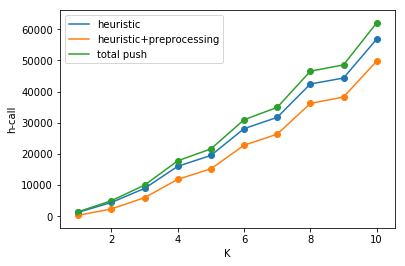

In [363]:
# Graph 13: [heuristic call, K]
x0, y0 = gen_xy(df, 'k', 'hcall')
x1, y1 = gen_xy(df, 'k', 'hcall2')
x2, y2 = gen_xy(df, 'k', 'push_hi')
plot_graph('K', 'h-call', [x0, x1, x2], [y0, y1, y2], ['heuristic', 'heuristic+preprocessing','total push'])

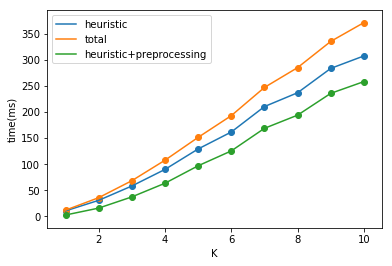

In [364]:
x0, y0 = gen_xy(df, "k", "h_cost")
x1, y1 = gen_xy(df, "k", "cost_hi")
x2, y2 = gen_xy(df, 'k', 'h_cost2')
y0 = [i / 1000 for i in y0]
y1 = [i / 1000 for i in y1]
y2 = [i / 1000 for i in y2]
plot_graph('K', 'time(ms)', [x0, x1, x2], [y0, y1, y2], ['heuristic', 'total', 'heuristic+preprocessing'])

### Explain

* Graph 11: the search space of `heuristic` and `knn` are increased by `K`, and the search space of `heuristic` is always smaller than `polyanya`

* Graph 12 shows that the `heuristic` approach would be slower than others when `K>2`

* Graph 13 shows the reason why the `heuristic` approach becomes slow